In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('winequality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Cleaning

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# no null values

## EDA

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
df.groupby('quality')['fixed acidity'].mean().sort_values()

quality
4    7.779245
5    8.167254
6    8.347179
3    8.360000
8    8.566667
7    8.872362
Name: fixed acidity, dtype: float64

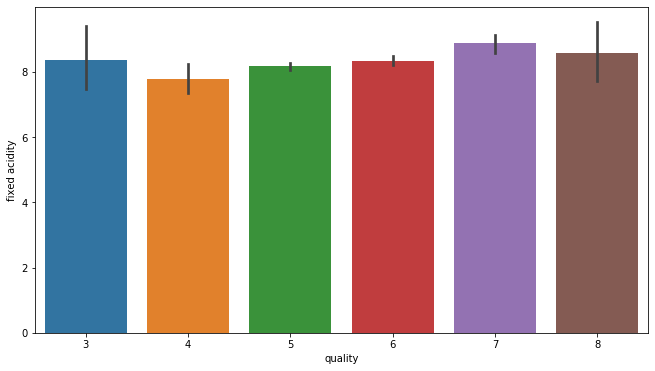

In [18]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='fixed acidity', data=df)

In [33]:
df.groupby('quality')['volatile acidity'].mean().sort_values()

quality
7    0.403920
8    0.423333
6    0.497484
5    0.577041
4    0.693962
3    0.884500
Name: volatile acidity, dtype: float64

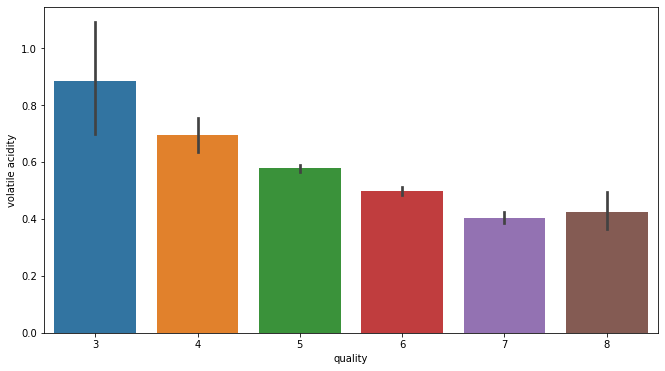

In [24]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='volatile acidity', data=df)

In [34]:
df.groupby('quality')['citric acid'].mean().sort_values()

quality
3    0.171000
4    0.174151
5    0.243686
6    0.273824
7    0.375176
8    0.391111
Name: citric acid, dtype: float64

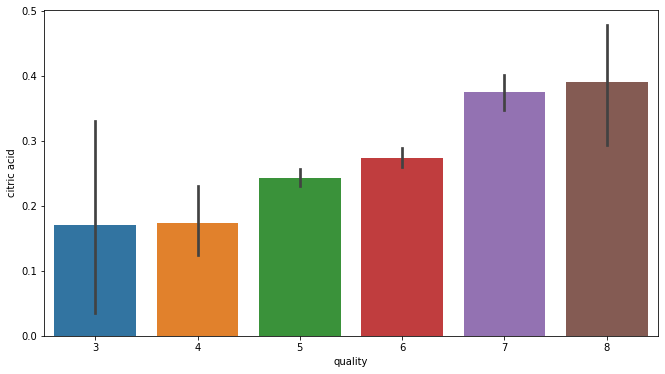

In [35]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='citric acid', data=df)

In [37]:
df.groupby('quality')['residual sugar'].mean().sort_values()

quality
6    2.477194
5    2.528855
8    2.577778
3    2.635000
4    2.694340
7    2.720603
Name: residual sugar, dtype: float64

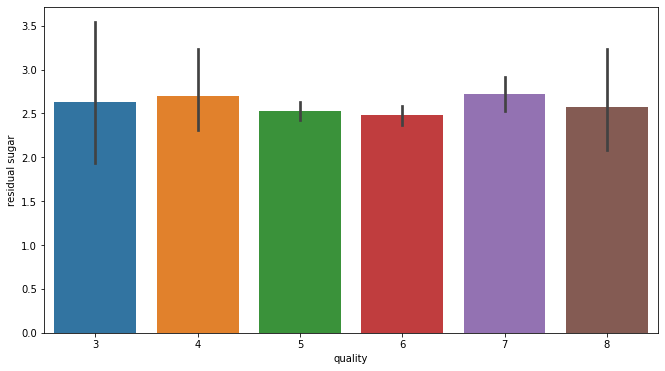

In [36]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='residual sugar', data=df)

In [38]:
df.groupby('quality')['chlorides'].mean().sort_values()

quality
8    0.068444
7    0.076588
6    0.084956
4    0.090679
5    0.092736
3    0.122500
Name: chlorides, dtype: float64

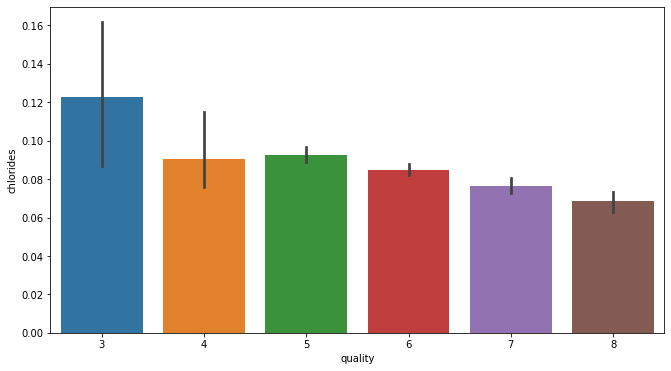

In [39]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='chlorides', data=df)

In [42]:
df.groupby('quality')['free sulfur dioxide'].mean().sort_values()

quality
3    11.000000
4    12.264151
8    13.277778
7    14.045226
6    15.711599
5    16.983847
Name: free sulfur dioxide, dtype: float64

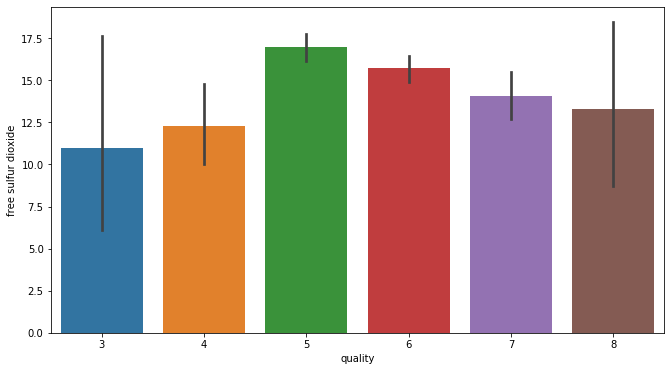

In [40]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

In [43]:
df.groupby('quality')['total sulfur dioxide'].mean().sort_values()

quality
3    24.900000
8    33.444444
7    35.020101
4    36.245283
6    40.869906
5    56.513950
Name: total sulfur dioxide, dtype: float64

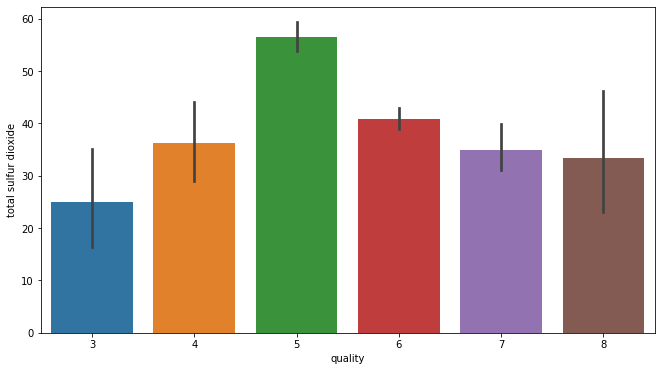

In [46]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

In [51]:
df.groupby('quality')['density'].mean().sort_values()

quality
8    0.995212
7    0.996104
4    0.996542
6    0.996615
5    0.997104
3    0.997464
Name: density, dtype: float64

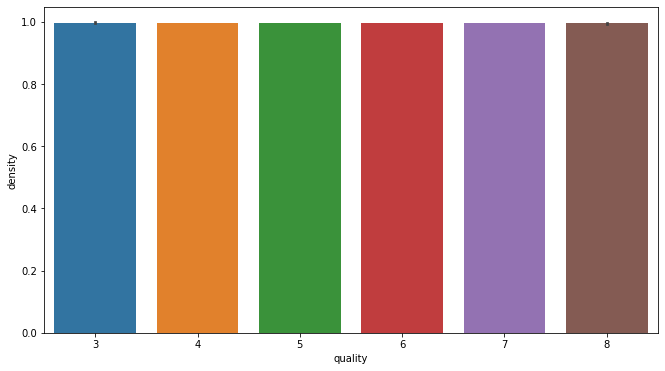

In [47]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='density', data=df)

In [52]:
df.groupby('quality')['pH'].mean().sort_values()

quality
8    3.267222
7    3.290754
5    3.304949
6    3.318072
4    3.381509
3    3.398000
Name: pH, dtype: float64

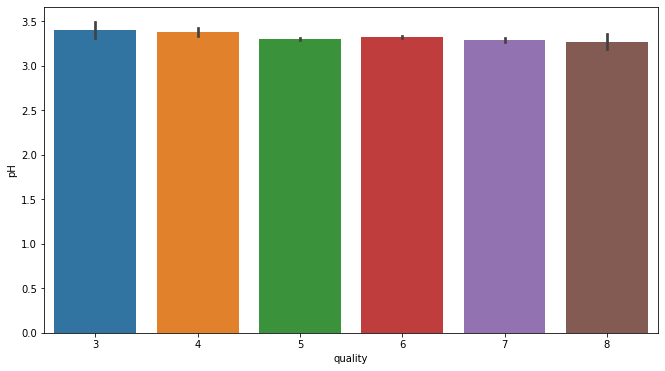

In [53]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='pH', data=df)

In [60]:
df.groupby('quality')['sulphates'].mean().sort_values()

quality
3    0.570000
4    0.596415
5    0.620969
6    0.675329
7    0.741256
8    0.767778
Name: sulphates, dtype: float64

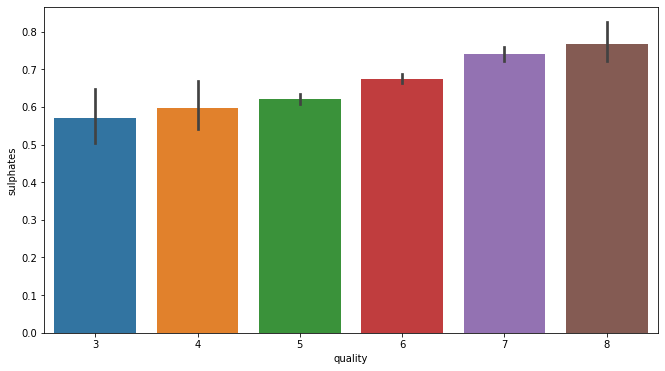

In [55]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='sulphates', data=df)

In [57]:
df.groupby('quality')['alcohol'].mean().sort_values()

quality
5     9.899706
3     9.955000
4    10.265094
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

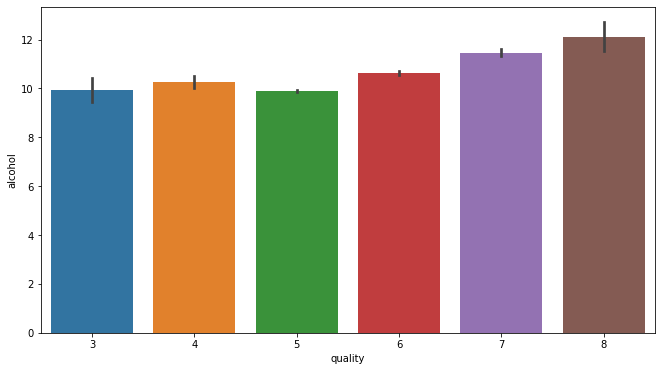

In [56]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='alcohol', data=df)

## Feature Selection

### Checking for correlation 

In [63]:
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [65]:
print(corr['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [68]:
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
cr=ExtraTreesClassifier()

In [72]:
x=df.drop('quality',axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [73]:
y=df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [74]:
cr.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [76]:
print(cr.feature_importances_)

[0.07794471 0.09809065 0.08014966 0.07831927 0.07843194 0.07354913
 0.1019715  0.08675527 0.07299551 0.10275819 0.14903416]


In [81]:
feature_importance=pd.Series(cr.feature_importances_,index=x.columns)
feature_importance.sort_values(ascending=False)

alcohol                 0.149034
sulphates               0.102758
total sulfur dioxide    0.101971
volatile acidity        0.098091
density                 0.086755
citric acid             0.080150
chlorides               0.078432
residual sugar          0.078319
fixed acidity           0.077945
free sulfur dioxide     0.073549
pH                      0.072996
dtype: float64

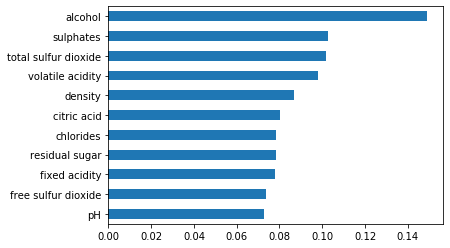

In [83]:
feature_importance.sort_values(ascending=True).plot(kind='barh')